In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
#drop Irrelevant col
df.drop('unique_id', axis=1, inplace = True)

In [5]:
df.shape

(26707, 33)

In [6]:
df.tail()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [7]:
df.h1n1_vaccine.value_counts()  #t v

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

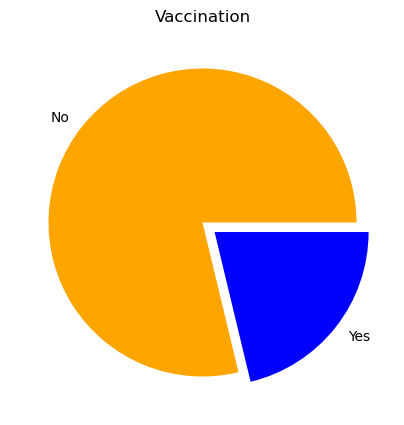

In [8]:
plt.figure(figsize=(5,5))
labels=['No','Yes']
explode=[0,.1]
colors=['Orange','Blue']
x = df['h1n1_vaccine'].value_counts().values
plt.pie(x,explode,labels,colors)
plt.title('Vaccination')
plt.show()

In [9]:
df_obj = df.select_dtypes(include=np.object_)
df_obj.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [10]:
#Univariate Analysis

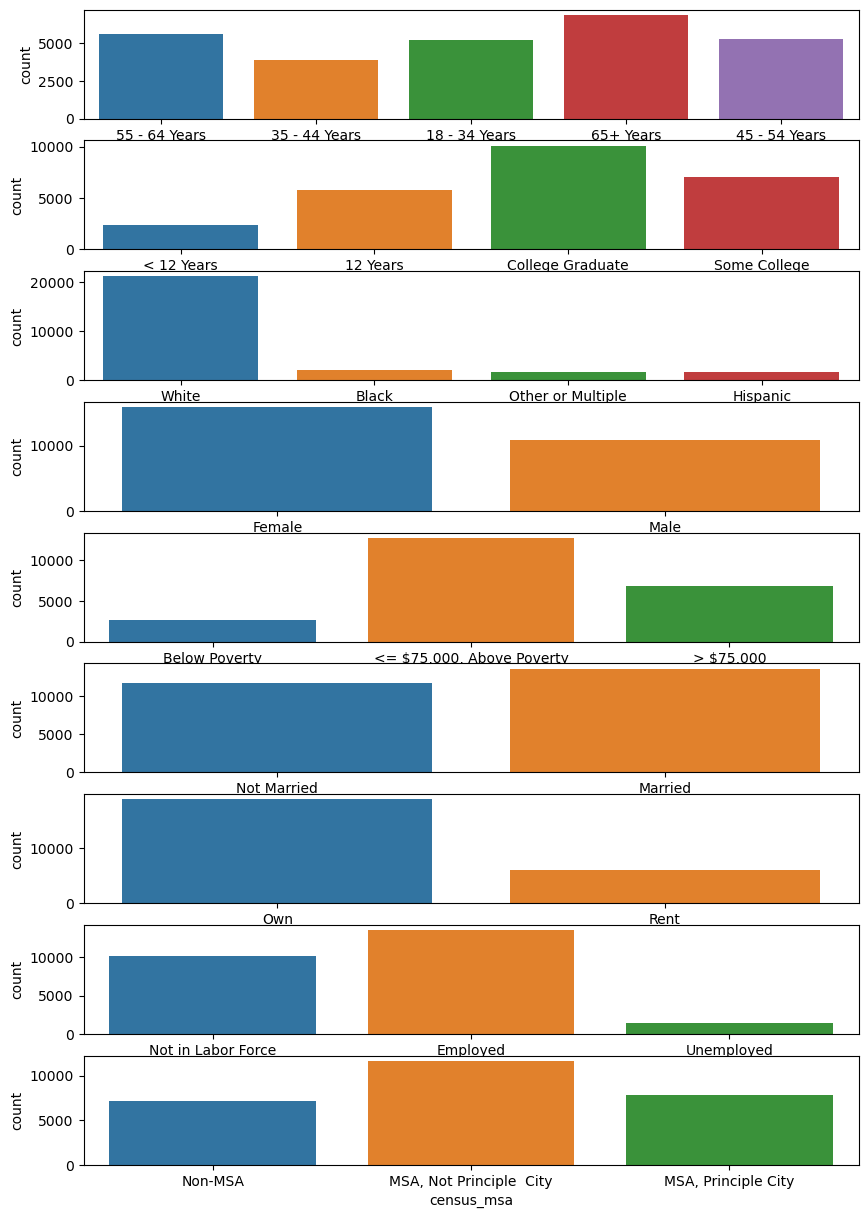

In [11]:
fig, ax = plt.subplots(9,1, figsize = (10,15))
cols = ['age_bracket', 'qualification', 'race', 'sex', 'income_level','marital_status', 'housing_status', 'employment', 'census_msa']

for i ,val in enumerate(cols):
    sns.countplot(x = val, data=df, ax = ax[i])

In [12]:
# Bi-Varaite Analysis

<Axes: xlabel='census_msa', ylabel='count'>

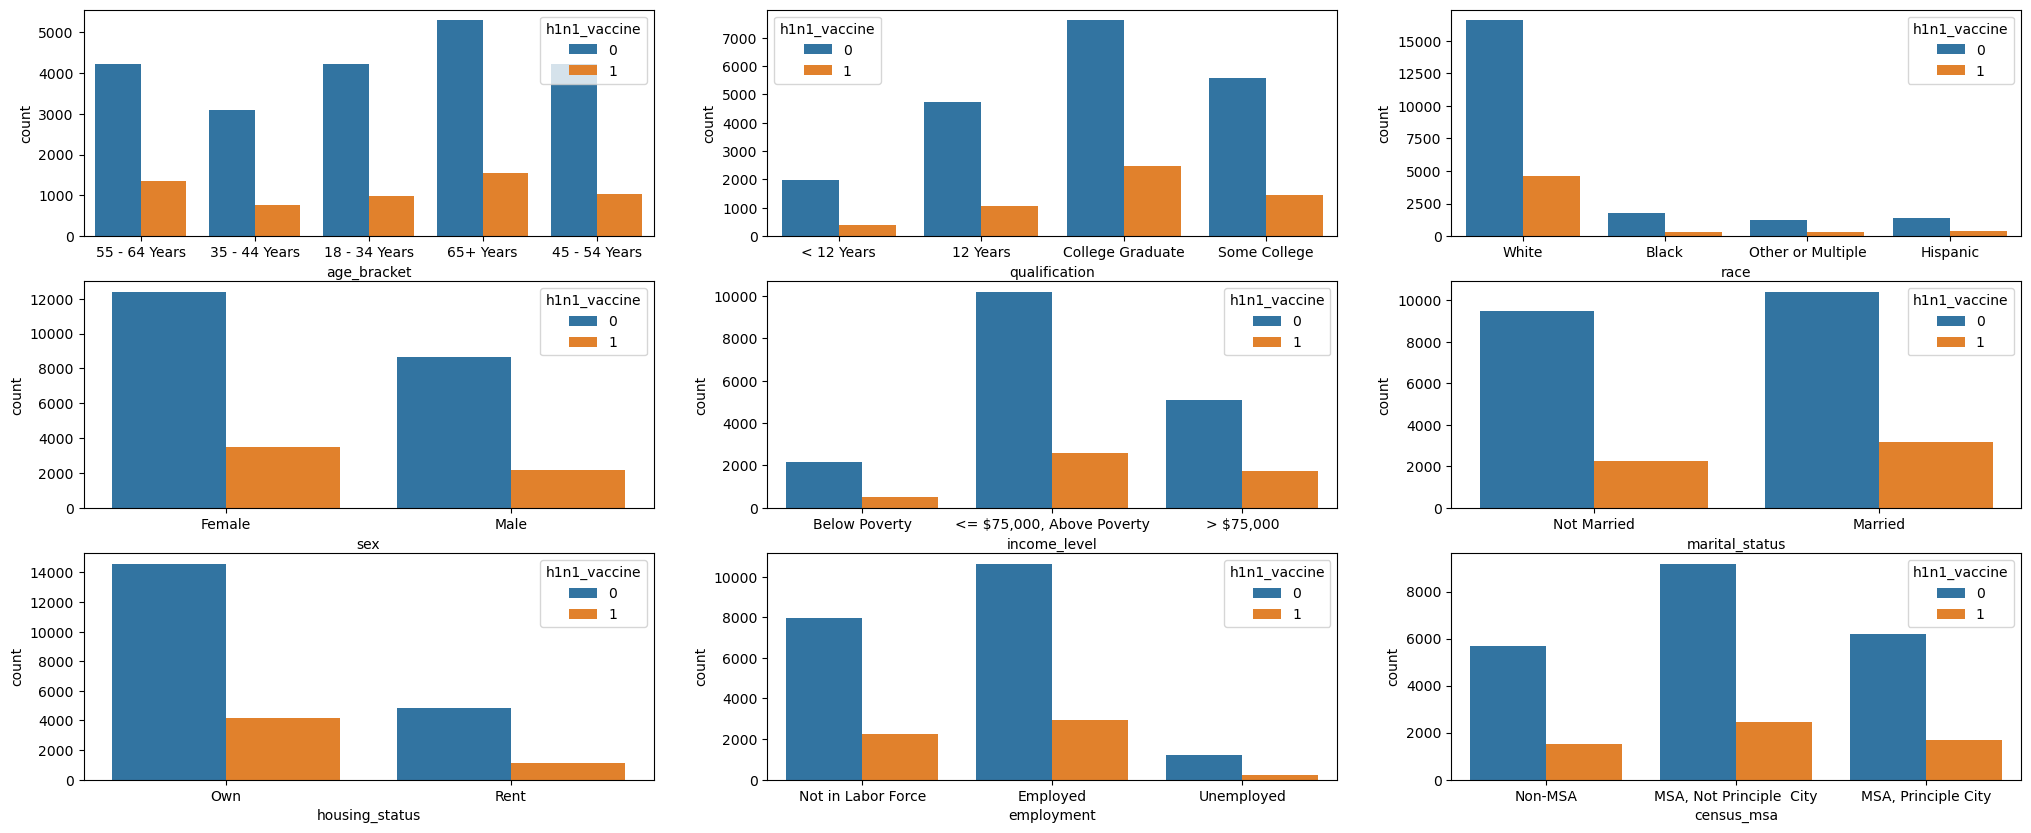

In [13]:
fig, ax = plt.subplots(3,3, figsize = (25,10))
sns.countplot(x = 'age_bracket',hue = 'h1n1_vaccine', data=df, ax=ax[0][0])
sns.countplot(x = 'qualification',hue = 'h1n1_vaccine', data=df, ax=ax[0][1])
sns.countplot(x = 'race',hue = 'h1n1_vaccine', data=df, ax=ax[0][2])
sns.countplot(x = 'sex',hue = 'h1n1_vaccine', data=df, ax=ax[1][0])
sns.countplot(x = 'income_level',hue = 'h1n1_vaccine', data=df, ax=ax[1][1])
sns.countplot(x = 'marital_status',hue = 'h1n1_vaccine', data=df, ax=ax[1][2])
sns.countplot(x = 'housing_status',hue = 'h1n1_vaccine', data=df, ax=ax[2][0])
sns.countplot(x = 'employment',hue = 'h1n1_vaccine', data=df, ax=ax[2][1])
sns.countplot(x = 'census_msa',hue = 'h1n1_vaccine', data=df, ax=ax[2][2])


In [14]:
## Feature Engeneering

In [15]:
#check null values
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [16]:
#handling missing values
for i in df.columns:
    if(df[i].isnull().sum()>0):
        df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
df.isnull().mean()

h1n1_worry                   0.0
h1n1_awareness               0.0
antiviral_medication         0.0
contact_avoidance            0.0
bought_face_mask             0.0
wash_hands_frequently        0.0
avoid_large_gatherings       0.0
reduced_outside_home_cont    0.0
avoid_touch_face             0.0
dr_recc_h1n1_vacc            0.0
dr_recc_seasonal_vacc        0.0
chronic_medic_condition      0.0
cont_child_undr_6_mnths      0.0
is_health_worker             0.0
has_health_insur             0.0
is_h1n1_vacc_effective       0.0
is_h1n1_risky                0.0
sick_from_h1n1_vacc          0.0
is_seas_vacc_effective       0.0
is_seas_risky                0.0
sick_from_seas_vacc          0.0
age_bracket                  0.0
qualification                0.0
race                         0.0
sex                          0.0
income_level                 0.0
marital_status               0.0
housing_status               0.0
employment                   0.0
census_msa                   0.0
no_of_adul

In [18]:
## Handling Categorical Data

In [19]:
## label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
        df[i] = le.fit_transform(df[i])

In [20]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score

# Feature Selection

In [23]:
from sklearn.feature_selection import chi2
x1 = df.drop('h1n1_vaccine',axis = 1)
y1 = df.h1n1_vaccine

In [24]:
#return the f score and p_value
f1_score= chi2(x1,y1)

In [25]:
f1_score

(array([2.01358892e+02, 1.11808117e+02, 4.11096977e+01, 1.59504077e+01,
        1.23284462e+02, 2.58568639e+01, 5.61483986e+00, 8.64154522e+00,
        4.30653783e+01, 3.30781019e+03, 8.92499456e+02, 1.72886102e+02,
        1.09342915e+02, 6.72405011e+02, 3.04643931e+00, 4.95639893e+02,
        1.91415123e+03, 1.15654361e+02, 2.43320341e+02, 1.22231992e+03,
        2.01581768e+00, 4.37694949e+01, 2.01459556e+01, 1.49313640e+01,
        6.77656778e+00, 1.28867110e+01, 3.05614312e+01, 1.99380265e+01,
        2.49155964e+00, 3.83927863e-03, 9.07646362e-01, 2.84434376e-01]),
 array([1.05510630e-045, 3.93620890e-026, 1.43920477e-010, 6.50237709e-005,
        1.20823440e-028, 3.67694855e-007, 1.78090085e-002, 3.28582623e-003,
        5.29408499e-011, 0.00000000e+000, 4.19137320e-196, 1.73317808e-039,
        1.36504702e-025, 2.99632034e-148, 8.09143610e-002, 8.44597327e-110,
        0.00000000e+000, 5.65791678e-027, 7.42579815e-055, 8.60189894e-268,
        1.55667387e-001, 3.69418347e-011, 

In [26]:
p_values = pd.Series(f1_score[1], index = x1.columns)

In [27]:
irr_cols = []
for x in p_values.index:
    if p_values[x] <= 0.05:
        print(x,':-Reject the Null Hypothesis')
    else:
        print(x,':-Accept the Null Hypothesis')
        irr_cols.append(x)

h1n1_worry :-Reject the Null Hypothesis
h1n1_awareness :-Reject the Null Hypothesis
antiviral_medication :-Reject the Null Hypothesis
contact_avoidance :-Reject the Null Hypothesis
bought_face_mask :-Reject the Null Hypothesis
wash_hands_frequently :-Reject the Null Hypothesis
avoid_large_gatherings :-Reject the Null Hypothesis
reduced_outside_home_cont :-Reject the Null Hypothesis
avoid_touch_face :-Reject the Null Hypothesis
dr_recc_h1n1_vacc :-Reject the Null Hypothesis
dr_recc_seasonal_vacc :-Reject the Null Hypothesis
chronic_medic_condition :-Reject the Null Hypothesis
cont_child_undr_6_mnths :-Reject the Null Hypothesis
is_health_worker :-Reject the Null Hypothesis
has_health_insur :-Accept the Null Hypothesis
is_h1n1_vacc_effective :-Reject the Null Hypothesis
is_h1n1_risky :-Reject the Null Hypothesis
sick_from_h1n1_vacc :-Reject the Null Hypothesis
is_seas_vacc_effective :-Reject the Null Hypothesis
is_seas_risky :-Reject the Null Hypothesis
sick_from_seas_vacc :-Accept the N

In [28]:
irr_cols

['has_health_insur',
 'sick_from_seas_vacc',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children']

In [29]:
#drop all the irrelevant columns
df.drop(labels = irr_cols, axis = 1, inplace = True)

In [30]:
df.shape

(26707, 27)

## Data Split

In [31]:
X = df.drop(columns = ['h1n1_vaccine'])
y = df['h1n1_vaccine']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,train_size=0.80, random_state=18)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [35]:
pred = log_reg.predict(X_test)

## Model Evaluation

In [37]:
print("Accuracy Score", accuracy_score(y_test, pred))

print("AUC Score", roc_auc_score(y_test, pred))

Accuracy Score 0.8356420816173717
AUC Score 0.6751023447814481


In [ ]:
print("F1_Score", f1_score(y_test, pred))

In [ ]:
cm = confusion_matrix(y_test,pred)
plt.figure(figsize= (12,9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predication')
plt.ylabel('truth')